<a href="https://colab.research.google.com/github/andresvillamayor/ML_Imagenes/blob/main/Sampling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sampling Procesamiento de imagenes

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
from cv2 import imread
import matplotlib.pyplot as plt

# Valores de la imagen

In [3]:
def howis(img):
  print('size = ',img.shape)
  print('max  = ',np.max(img))
  print('min  = ',np.min(img))

# Choose one image

In [4]:
st_img = ('/content/drive/MyDrive/Imagenes_ML/datos/mandril.png')
#st_img = 'scale.png'

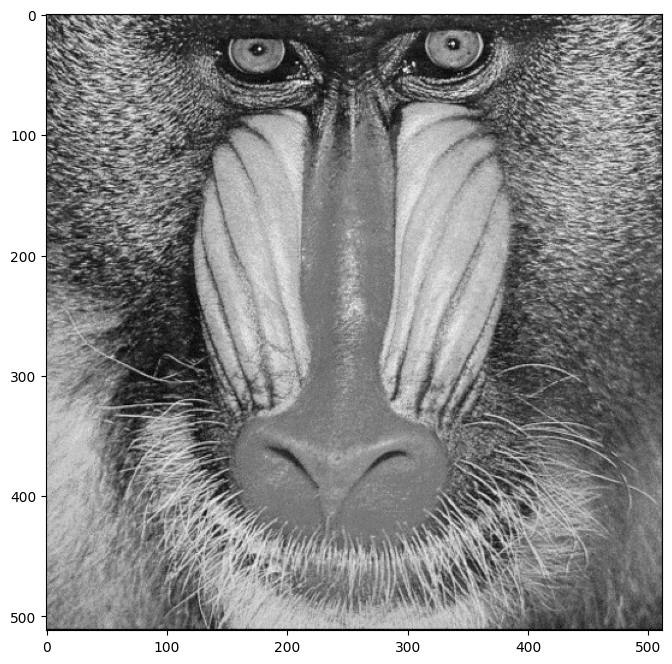

In [5]:
img = imread(st_img)
X = img[:,:,0]
plt.figure(figsize=(8,8))
plt.imshow(X,cmap='gray')
plt.show()

# Sampling muestreo espacial

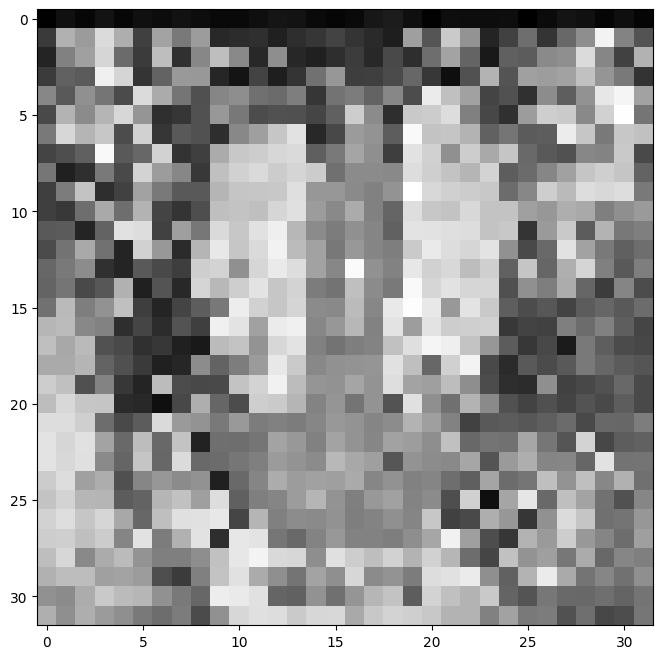

size =  (32, 32)
max  =  227
min  =  0


In [11]:
d = 16  # sampling each d pixels
(Nx,Mx) = X.shape
ix = range(0,Nx,d)
jx = range(0,Mx,d)
Ny = len(ix)
My = len(jx)
Y = np.zeros((Ny,My),np.uint8)
for i in range(Ny):
  for j in range(My):
    Y[i,j] = X[ix[i],jx[j]]
plt.figure(figsize=(8,8))
plt.imshow(Y,cmap='gray')
plt.show()
howis(Y)

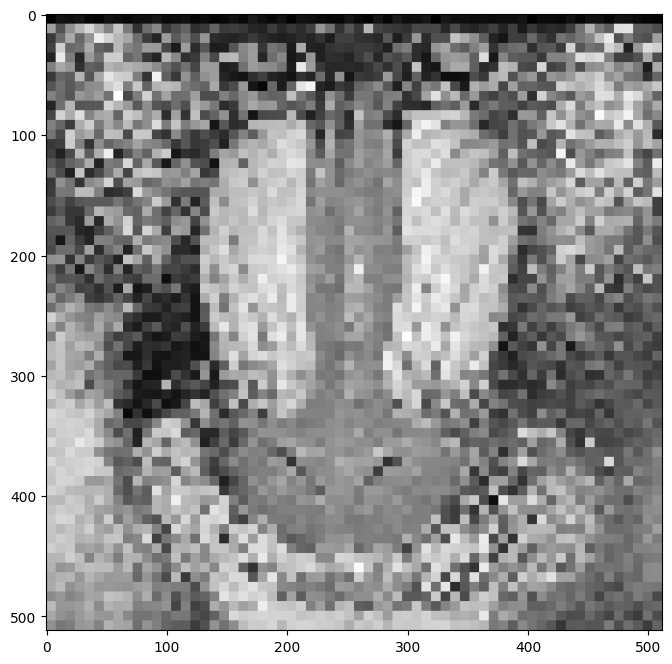

size =  (512, 512)
max  =  237
min  =  0
displayed as =  64 x 64


In [ ]:
d = 8  # sampling each d pixels
(Nx,Mx) = X.shape
Ny = Nx
My = Mx
Y = np.zeros((Ny,My),np.uint8)
for i in range(Ny):
  for j in range(My):
    ix = int(np.fix(i/d)*d)
    jx = int(np.fix(j/d)*d)
    Y[i,j] = X[ix,jx]
plt.figure(figsize=(8,8))
plt.imshow(Y,cmap='gray')
plt.show()
howis(Y)
print('displayed as = ',int(Nx/d),'x',int(Nx/d))

# Histogram

In [ ]:
def imhist(X,n=256):
  (N,M) = X.shape
  h = np.zeros((n,))
  for i in range(N):
    for j in range(M):
      x = X[i,j]
      h[x] = h[x]+1
  return h


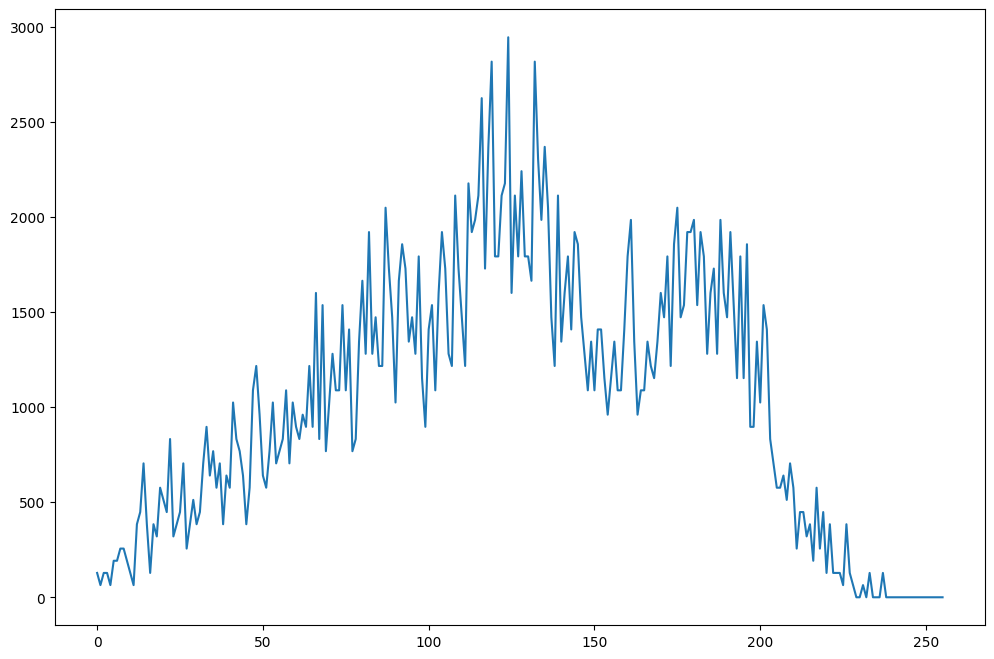

In [ ]:
n = 256
h = imhist(Y,n=n)
plt.figure(figsize=(12,8))
plt.plot(range(n),h[0:n])
plt.show()


# Quantization

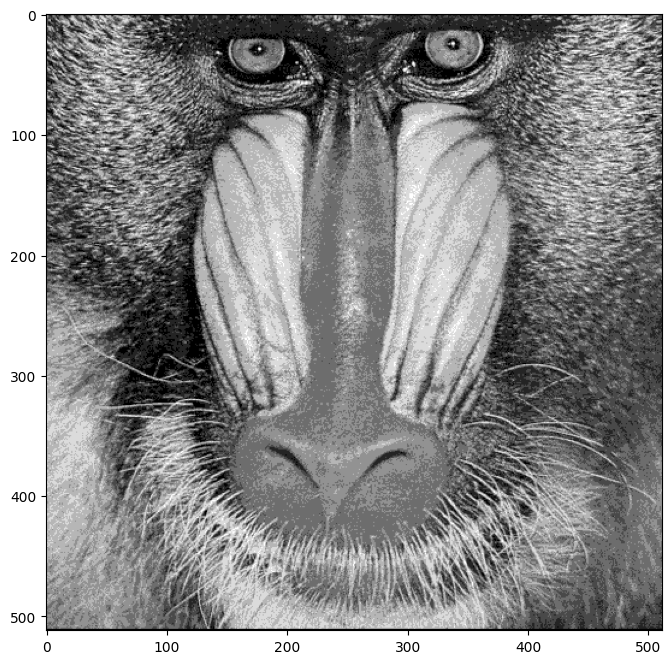

size =  (512, 512)
max  =  224
min  =  0
This image has =  8  grayvalues


In [ ]:
p = 32  # each p grayvalues
(Nx,Mx) = X.shape
Ny = Nx
My = Mx
Y = np.zeros((Ny,My),np.uint8)
for i in range(Ny):
  for j in range(My):
    x = int(np.fix(X[i,j]/p)*p)
    Y[i,j] = x
plt.figure(figsize=(8,8))
plt.imshow(Y,cmap='gray')
plt.show()
howis(Y)
print('This image has = ',int(256/p),' grayvalues')

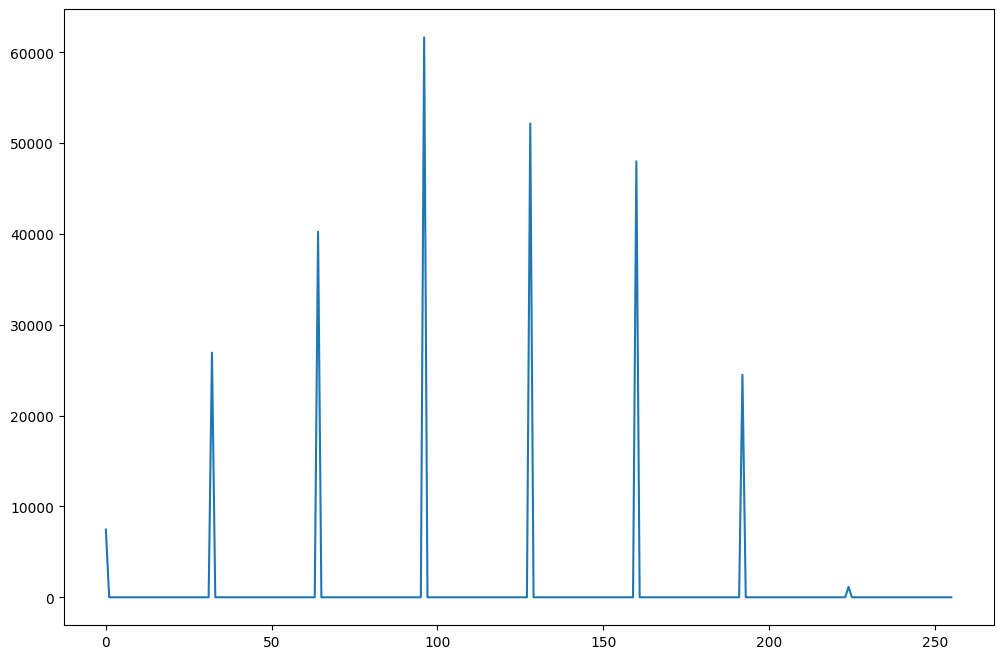

In [ ]:
n = 256
h = imhist(Y,n=n)
plt.figure(figsize=(12,8))
plt.plot(range(n),h[0:n])
plt.show()

In [ ]:
print(h[0:256])

[ 7457.     0.     0.     0.     0.     0.     0.     0.     0.     0.
     0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
     0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
     0.     0. 26940.     0.     0.     0.     0.     0.     0.     0.
     0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
     0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
     0.     0.     0.     0. 40266.     0.     0.     0.     0.     0.
     0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
     0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
     0.     0.     0.     0.     0.     0. 61669.     0.     0.     0.
     0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
     0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
     0.     0.     0.     0.     0.     0.     0.     0. 52168.     0.
     0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
     0